How to install Keras in local: https://oindrilasen.com/2021/02/how-to-install-and-import-keras-in-anaconda-jupyter-notebooks/

In [1]:
from keras.applications.vgg16 import preprocess_input, VGG16
from keras.preprocessing import image as kimage
import keras

import os
import numpy as np
from PIL import Image
%matplotlib inline
import matplotlib.pyplot as plt
import pickle
from tqdm import tqdm

Populating the interactive namespace from numpy and matplotlib


In [2]:
vggModel = VGG16(weights='imagenet', include_top=False)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.

58892288/58889256 [==============================] - 16s 0us/step


In [3]:
img_path = "../data/image_data"

In [8]:
k = len(os.listdir(img_path))
image = [0]*k
x = [0]*k
i=0
error_image = []
with tqdm(total=k) as pbar:
    for fileName in os.listdir(img_path):
        pbar.update(1)
        try:
            image[i] = kimage.load_img(os.path.join(img_path, fileName), target_size=(300,300))
        except:
            image[i] = image[i-1]
            error_image.append(fileName)
        x[i] = kimage.img_to_array(image[i])
        x[i] = np.expand_dims(x[i], axis=0)
        # preprocess_input: The images are converted from RGB to BGR, then each color channel 
        # is zero-centered with respect to the ImageNet dataset, without scaling.
        x[i] = preprocess_input(x[i])
        i += 1
print(error_image)

100%|██████████| 2371/2371 [00:24<00:00, 94.98it/s] 

['2615_LEA INNER CIRCLE - MAUVE_mauve_Zerum.png', '448_BASIC V-NECK T-SHIRT_Black_Zara.png', '2381_T-shirt Stockholm Bike Pattern Charcoal_grey_Dedicated.png']


In [4]:
# for fileName in os.listdir(img_path):
#   print(fileName)

1959_The Relaxed Fit Eco-Batwing Tee_white_thegoodtee.png
828_Oversized Printed T-shirt_White red blue_H&M.png
1303_men DRY-EX crew neck short-sleeve t-shirt_WHITE_uniqlo.png
1188_u crew neck short-sleeve t-shirt_GREEN_uniqlo.png
906_Crop T-shirt_White dark blue_H&M.png
979_women supima cotton v-neck short-sleeve t-shirt_LIGHT GRAY_uniqlo.png
2055_T-shirt Visby Pencil Bike Charcoal_grey_Dedicated.png
1631_TreeBlend Classic T-Shirt_TWILIGHT MAUVE HEATHER_tentree.png
1134_women cotton ribbed long-sleeve cropped cardigan_OFF WHITE_uniqlo.png
1471_Bear Claw T-Shirt_CHERRY MAHOGANY HEATHER_tentree.png
2532_Women's Organic V-neck T-shirt_dusk_fair indigo.png
1298_men DRY-EX crew neck long-sleeve t-shirt_GRAY_uniqlo.png
1293_men DRY-EX crew neck short-sleeve t-shirt_BLACK_uniqlo.png
1212_waffle henley long-sleeve t-shirt_OFF WHITE_uniqlo.png
377_COMBINATION HEM TOP_White_Zara.png
994_women HEATTECH fleece turtleneck long-sleeve t-shirt_DARK GRAY_uniqlo.png
324_ASYMMETRICAL TOP_Black_Zara.png


2332_T-shirt Stockholm Moose Sauna Charcoal_grey_Dedicated.png
340_ASYMMETRIC COTTON T-SHIRT_White_Zara.png
1932_The Fave &amp; Fair  Unisex Tee_white_thegoodtee.png
1948_Fave &amp; Fair Unisex Tee- 3 Pack_black white grey_thegoodtee.png
2181_T-shirt Visby Color Stripes_multicolor_Dedicated.png
1872_Natural Dye Kit Cochineal &amp; Ground Madder Root (pink and orange) + Good Tee Unisex_white_thegoodtee.png
461_T-SHIRT WITH RUCHING_Oyster White_Zara.png
2660_SIMULTANEOUSITY - ARSENIC_gray_Zerum.png
2002_Fair &amp; Fave Cropped Pocket Tee_black_thegoodtee.png
611_Printed T-shirt_Light pink light orange_H&M.png
2578_Women's Organic Slim Mock Neck Tee_stone green_fair indigo.png
387_TOP WITH VOLUMINOUS SLEEVES_White_Zara.png
935_women HEATTECH fleece turtleneck long-sleeve t-shirt_OFF WHITE_uniqlo.png
847_Zodiac T-shirt_Black white_H&M.png
2127_T-shirt Mysen Woodstock White_white_Dedicated.png
2606_LEA - BALANCE_white_Zerum.png
2394_T-shirt Lillehammer Peanuts Friends Navy_navy_Dedicated.pn

width300, height300


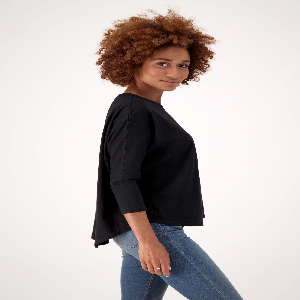

In [9]:
# Original image
w, h = image[0].size
print(f"width{w}, height{h}")
image[0]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


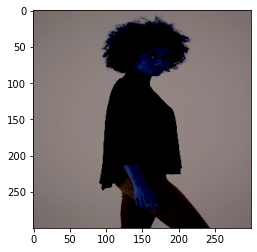

In [10]:
# The image below is preprocess, different from original image
t = x[0][0,:,:,:]
plt.imshow(t/255)

In [13]:
if os.path.isfile("similarity_deep.pkl"):
    with open('similarity_deep.pkl', 'rb') as openfile:
        similarity_deep = pickle.load(openfile)
else:
    prediction = [0]*k
    # got 41472 from ValueError message from prediction[i]
    # ValueError: could not broadcast input array from shape (41472) into shape (45000)
    matrix_res = np.zeros([k, 41472])
    for i in range(k):
        prediction[i] = vggModel.predict(x[i]).ravel()
        matrix_res[i,:] = prediction[i]
    
    similarity_deep = matrix_res.dot(matrix_res.T)
    norms = np.array([np.sqrt(np.diagonal(similarity_deep))])
    similarity_deep = similarity_deep / norms / norms.T

In [14]:
similarity_deep.shape

(2324, 2324)

In [ ]:
# with open('/content/drive/MyDrive/Colab Notebooks/similarity_deep.pkl', 'wb') as outp:
#     pickle.dump(similarity_deep, outp)
# with open('/content/drive/MyDrive/Colab Notebooks/similarity_deep.pkl', 'rb') as openfile:
#     similarity_deep = pickle.load(openfile)

In [42]:
# k indicate top ?, tshirt_input indicates original input to similarity matrix
k=5
tshirt_input = 19
top5 = np.argsort(similarity_deep[tshirt_input,:])[:-k-1:-1]

In [43]:
# similarity score
print(similarity_deep[tshirt_input,top5])
# print image index
print(top5)

[1.         1.         0.75341791 0.75341791 0.6793644 ]
[2015   19   13 2011  313]


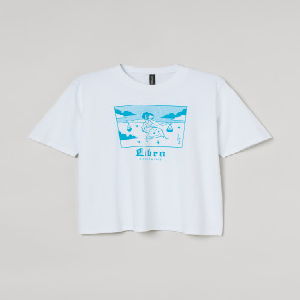

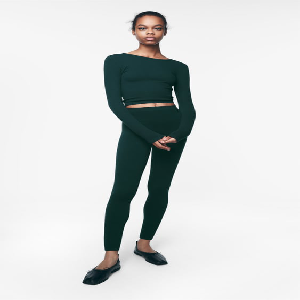

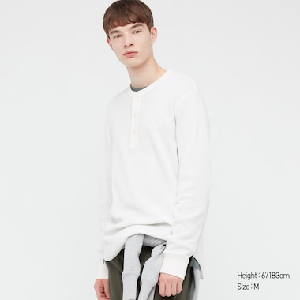

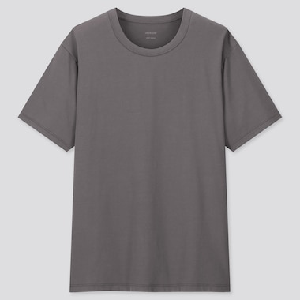

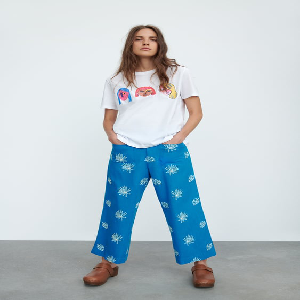

In [44]:
for idx in top5:
  display(image[idx])

In [ ]:
# find cosine similarity between two vectors:
# import scipy
# vector1 = [1,2,3]
# vector2 = [3,2,1]
# cosine_similarity = 1 - scipy.spatial.distance.cosine(vector1, vector2)
# cosine_similarity